# 한국노동패널(개인용) 23차 데이터 활용하여 분석하기 1

In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns

In [3]:
# 데이터 불러오기
labor = pd.read_csv('labor_220726.csv')

In [4]:
labor

,hhid,pid,wave,year,p_age,p_econstat,p_edu,p_employ_type,p_firm_size,p_hours,...,p_sample18,p_sample98,p_sex,p_wage,p_weight09_c,p_weight09_l,p_weight18_c,p_weight18_l,p_weight98_c,p_weight98_l
0,1,101,23,2020,79,3,2.0,NaN,NaN,NaN,...,2,1,2,NaN,2667.7795,1234.9795,1115.08090,0.0000,2347.81930,2281.38430
1,1,102,23,2020,52,1,3.0,1.0,2.0,40.0,...,2,1,1,380.0,2734.8757,4626.6772,1171.21970,2500.3066,2347.81930,2414.47900
2,6034,201,23,2020,69,1,3.0,1.0,2.0,40.0,...,1,2,1,150.0,2429.3152,2731.7363,1288.86390,1332.4055,2917.80930,2917.94920
3,2,202,23,2020,66,1,3.0,1.0,1.0,35.0,...,1,1,2,120.0,4841.4199,5648.7803,2238.85500,2462.2083,2578.34960,2578.47310
4,8589,203,23,2020,41,3,5.0,NaN,NaN,NaN,...,1,2,2,NaN,3167.1360,6758.2446,2137.31880,2048.2651,377.78696,755.61011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22959,210074,21007402,23,2020,32,3,6.0,NaN,NaN,NaN,...,2,3,2,NaN,NaN,NaN,1724.55320,0.0000,NaN,NaN
22960,210075,21007502,23,2020,23,3,3.0,NaN,NaN,NaN,...,2,3,2,NaN,NaN,NaN,1127.22750,0.0000,NaN,NaN
22961,210080,21008002,23,2020,32,1,6.0,1.0,4.0,40.0,...,2,3,1,530.0,NaN,NaN,1456.11570,0.0000,NaN,NaN
22962,210081,21008102,23,2020,41,1,5.0,2.0,1.0,50.0,...,2,3,1,450.0,NaN,NaN,930.78351,0.0000,NaN,NaN


In [5]:
labor.shape # 행, 열 개수 출력

(22964, 34)

In [6]:
labor.info() # 변수 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22964 entries, 0 to 22963
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hhid           22964 non-null  int64  
 1   pid            22964 non-null  int64  
 2   wave           22964 non-null  int64  
 3   year           22964 non-null  int64  
 4   p_age          22964 non-null  int64  
 5   p_econstat     22964 non-null  int64  
 6   p_edu          22961 non-null  float64
 7   p_employ_type  12464 non-null  float64
 8   p_firm_size    8000 non-null   float64
 9   p_hours        12429 non-null  float64
 10  p_ind2000      12410 non-null  float64
 11  p_ind2007      12410 non-null  float64
 12  p_ind2017      12410 non-null  float64
 13  p_job_begin    12346 non-null  object 
 14  p_job_status   12436 non-null  float64
 15  p_jobfam2000   12423 non-null  float64
 16  p_jobfam2007   12327 non-null  float64
 17  p_jobfam2017   12324 non-null  float64
 18  p_jobt

In [7]:
labor.describe # 요약 통계량

<bound method NDFrame.describe of          hhid       pid  wave  year  p_age  p_econstat  p_edu  p_employ_type  \
0           1       101    23  2020     79           3    2.0            NaN   
1           1       102    23  2020     52           1    3.0            1.0   
2        6034       201    23  2020     69           1    3.0            1.0   
3           2       202    23  2020     66           1    3.0            1.0   
4        8589       203    23  2020     41           3    5.0            NaN   
...       ...       ...   ...   ...    ...         ...    ...            ...   
22959  210074  21007402    23  2020     32           3    6.0            NaN   
22960  210075  21007502    23  2020     23           3    3.0            NaN   
22961  210080  21008002    23  2020     32           1    6.0            1.0   
22962  210081  21008102    23  2020     41           1    5.0            2.0   
22963  210101  21010102    23  2020     30           1    6.0            1.0   

     

In [8]:
# 변수 이름 바꾸기
labor = labor.rename(
    columns = {'p_sex' : 'sex',
               'p_age' : 'age',
               'p_married': 'marriage_type',
               'p_religion': 'religion',
               'p_wage' : 'income',
               'p_jobfam2017': 'code_job',
               'p_region': 'code_region'})

## 1. 성별에 따른 월급차이 

### 1) 성별

In [9]:
labor['sex'].dtypes # 성별 변수 타입 출력

dtype('int64')

In [10]:
labor['sex'].value_counts() # 빈도 구하기

2    12143
1    10821
Name: sex, dtype: int64

In [11]:
labor['sex']=np.where(labor['sex']==1, 'male', 'female') # 성별 항목 이름 부여

In [12]:
labor['sex'].value_counts() # 빈도 구하기

female    12143
male      10821
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

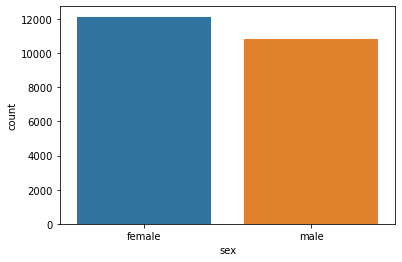

In [13]:
sns.countplot(data= labor, x='sex') # 빈도 막대 그래프 만들기

### 2) 월급

In [14]:
labor['income'].dtypes # 월급 변수 타입 출력

dtype('float64')

In [15]:
labor['income'].describe() # 요약 통계량

count    11750.000000
mean       277.712681
std        293.174292
min          0.000000
25%        160.000000
50%        240.000000
75%        350.000000
max      20000.000000
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='Count'>

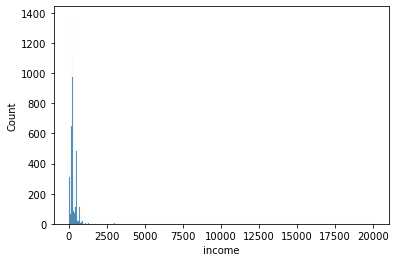

In [16]:
sns.histplot(data=labor, x='income') # 히스토그램

In [17]:
labor['income'].isna().sum() # 결측치 확인

11214

### 3) 성별에 따른 월급 차이

In [18]:
sex_income = labor.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income = ('income', 'mean')) 
# 결측치 처리, 성별 구분, 월급 평균

In [19]:
sex_income

,sex,mean_income
0,female,199.014142
1,male,329.567274


<AxesSubplot:xlabel='sex', ylabel='mean_income'>

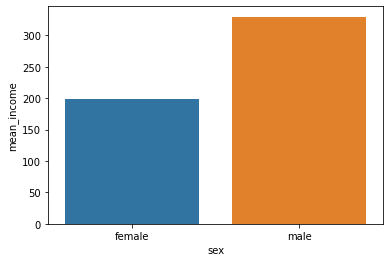

In [20]:
sns.barplot(data=sex_income, x='sex', y='mean_income') # 막대 그래프 만들기

## 2. 나이와 월급의 관계

### 1) 나이

In [21]:
labor['age'].dtypes # 나이 변수 타입

dtype('int64')

In [22]:
labor['age'].describe() # 요약 통계량 구하기

count    22964.000000
mean        51.935638
std         18.939084
min         15.000000
25%         38.000000
50%         52.000000
75%         67.000000
max        104.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

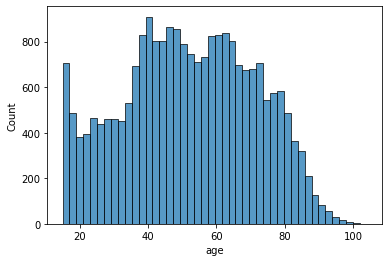

In [23]:
sns.histplot(data=labor, x='age') # 히스토그램

In [25]:
labor['age'].isna().sum() # 결측치 확인

0

### 2) 나이별 월급

In [26]:
# 나이별 월급 표
age_income = labor.dropna(subset=['income']).groupby('age').agg(mean_income = ('income', 'mean'))

In [27]:
age_income.head()

,mean_income
age,
17,57.500000
18,130.000000
19,123.285714
20,111.694444
21,136.794118


<AxesSubplot:xlabel='age', ylabel='mean_income'>

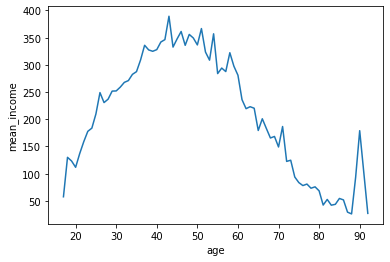

In [29]:
sns.lineplot(data=age_income, x = 'age', y='mean_income') # 선 그래프